In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime

In [3]:
price_df = pd.read_csv(r'D:\SMIT\CDE\EDA-Project-Airbnb-Market-Trends\data\airbnb_price.csv')
room_type_df = pd.read_excel(r'D:\SMIT\CDE\EDA-Project-Airbnb-Market-Trends\data\airbnb_room_type.xlsx')
review_df = pd.read_csv(r'D:\SMIT\CDE\EDA-Project-Airbnb-Market-Trends\data\airbnb_last_review.tsv', sep='\t')

 # BASIC ANALYSIS PART:

In [4]:
earliest_review = review_df['last_review'].min()
most_recent_review = review_df['last_review'].max()
earliest_review

'April 01 2019'

In [5]:
nb_private_rooms = room_type_df[room_type_df['room_type'].str.lower() == 'private room'].shape[0]
nb_private_rooms

11356

In [6]:
# Remove non-numeric characters and convert to float
price_df['price'] = price_df['price'].str.replace('[^\d.]', '', regex=True).astype(float)

# Now calculate the average price
avg_price = price_df['price'].mean().round(2)

print(f"Average Price: {avg_price}")



Average Price: 141.78


In [7]:
review_dates = pd.DataFrame({
    'first_reviewed': [earliest_review],
    'last_reviewed': [most_recent_review],
    'nb_private_rooms': [nb_private_rooms],
    'avg_price': [avg_price]
})

# Display the summary DataFrame
review_dates

,first_reviewed,last_reviewed,nb_private_rooms,avg_price
0,April 01 2019,May 31 2019,11356,141.78


# INTERMEDIATE ANALYSIS PART


In [8]:
# 1. Neighborhood Trends
neighborhood_prices = price_df.groupby('nbhood_full').agg(
    average_price=('price', 'mean'),
    number_of_listings=('price', 'size')
).sort_values(by='average_price', ascending=False)

In [9]:
top_5_expensive_neighborhoods = neighborhood_prices.head(5)
top_5_expensive_neighborhoods


,average_price,number_of_listings
nbhood_full,,
"Brooklyn, Sea Gate",805.000000,2
"Manhattan, Tribeca",396.704918,61
"Manhattan, Flatiron District",342.055556,36
"Manhattan, NoHo",335.024390,41
"Manhattan, SoHo",299.162304,191


In [10]:
#QUESTION NUM 6:
import pandas as pd
from collections import Counter

# Example DataFrame (replace with your actual data)
data = {'description': ['This is a nice room', 'Amazing view from this room', None, 'Cozy and affordable']}
room_type_df = pd.DataFrame(data)

# Ensure all values in the description column are strings, replacing NaN with an empty string
room_type_df['description'] = room_type_df['description'].fillna('').astype(str)

# Define stopwords (replace with a more comprehensive list if needed)
stopwords = {'is', 'a', 'the', 'from', 'and', 'this'}

# Split descriptions into words, convert to lowercase, and filter out stopwords
descriptions = room_type_df['description'].str.lower().str.split()

# Flatten the list of words and filter out stopwords
all_words = [word for sublist in descriptions for word in sublist if word not in stopwords]

# Use Counter to get the 10 most common words
word_counts = Counter(all_words)
top_10_words = word_counts.most_common(10)

# Display the top 10 words
print(top_10_words)


[('room', 2), ('nice', 1), ('amazing', 1), ('view', 1), ('cozy', 1), ('affordable', 1)]


# ADVANCE ANALYSIS PART

In [11]:
# 1. Room Type Comparison
room_type_prices = price_df.merge(room_type_df[['listing_id', 'room_type']], on='listing_id')
avg_price_by_room_type = room_type_prices.groupby('room_type')['price'].mean()

# Plot the average price by room type
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_by_room_type.index, y=avg_price_by_room_type.values)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price (USD)')
plt.show()


KeyError: "None of [Index(['listing_id', 'room_type'], dtype='object')] are in the [columns]"

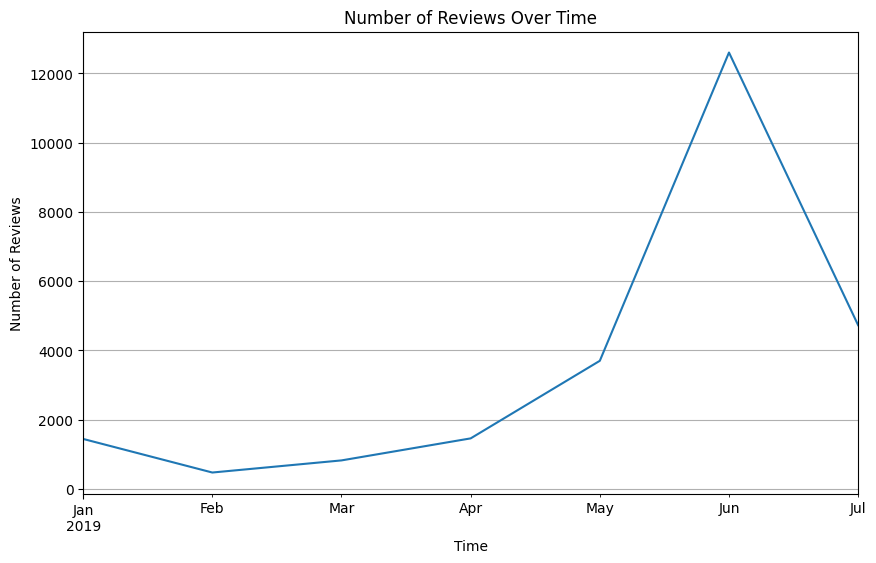

In [30]:
# 2. Trend Over Time
# Convert 'last_review' to datetime format
review_df['last_review'] = pd.to_datetime(review_df['last_review'])
review_df['year_month'] = review_df['last_review'].dt.to_period('M')

# Count reviews per month
reviews_per_month = review_df.groupby('year_month').size()

# Plot the trend of reviews over time
plt.figure(figsize=(10, 6))
reviews_per_month.plot(kind='line')
plt.title('Number of Reviews Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


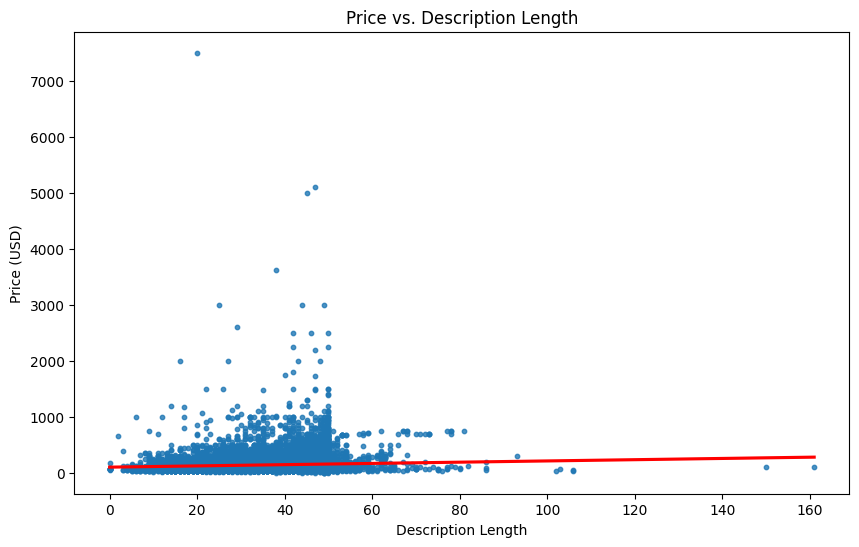

In [31]:
# 3. Scatter plot with regression line for price vs description length
price_df = price_df.merge(room_type_df[['listing_id', 'description']], on='listing_id')

# Calculate description length
price_df['description_length'] = price_df['description'].apply(lambda x: len(str(x)))

# Plot the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='description_length', y='price', data=price_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Price vs. Description Length')
plt.xlabel('Description Length')
plt.ylabel('Price (USD)')

# Annotate outliers (example for one outlier)
outliers = price_df[price_df['description_length'] > 1000]
for i, row in outliers.iterrows():
    plt.annotate(f"Outlier {row['listing_id']}", (row['description_length'], row['price']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


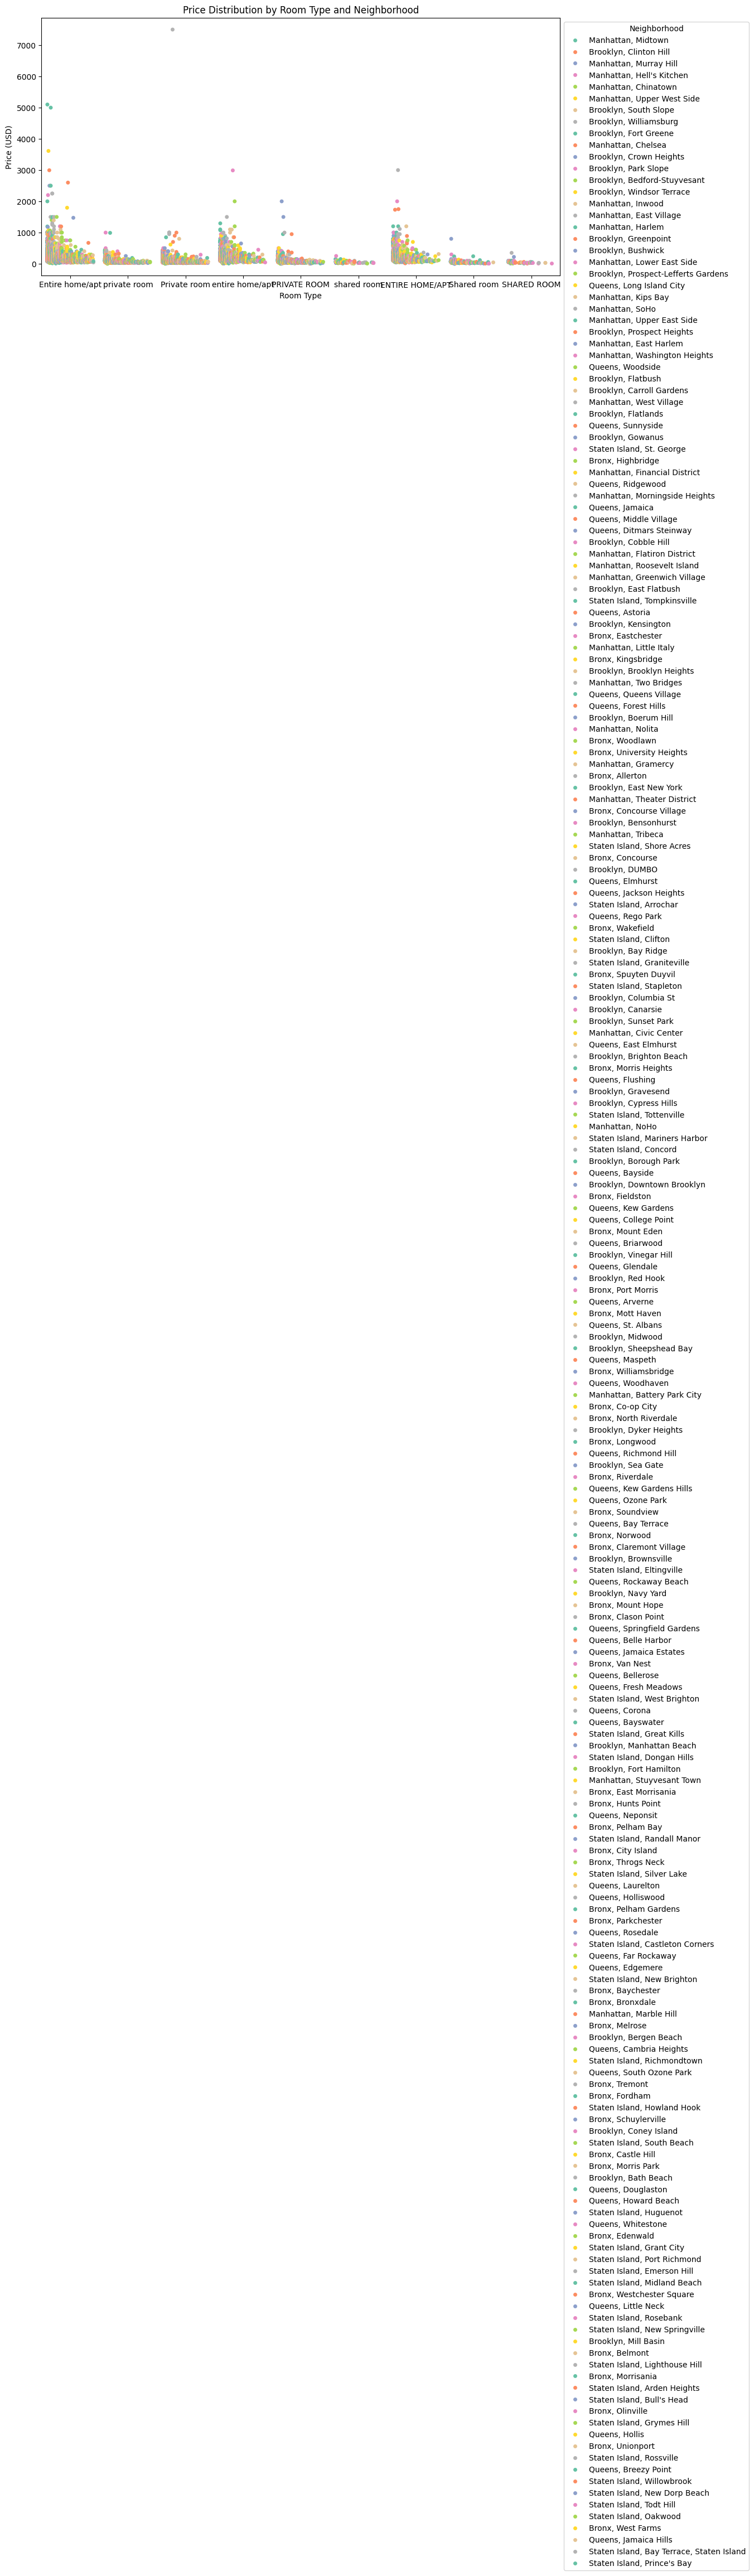

In [32]:
# 4. Strip Plot for Prices Grouped by Room Type and Hue by Neighborhood
plt.figure(figsize=(12, 6))
sns.stripplot(x='room_type', y='price', data=room_type_prices, hue='nbhood_full', jitter=True, dodge=True, palette='Set2')
plt.title('Price Distribution by Room Type and Neighborhood')
plt.xlabel('Room Type')
plt.ylabel('Price (USD)')
plt.legend(title='Neighborhood', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


# VISUALIZATION

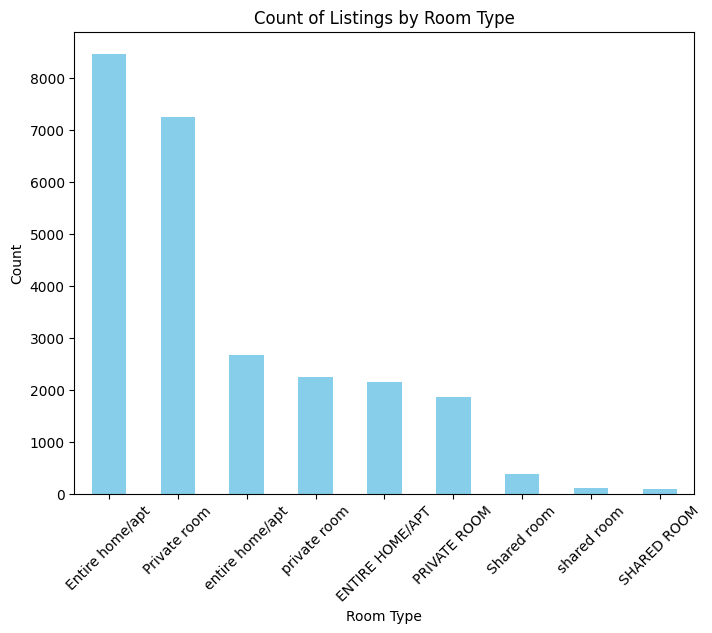

In [33]:
# 1. Bar Chart for Count of Listings by Room Type
room_type_counts = room_type_df['room_type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


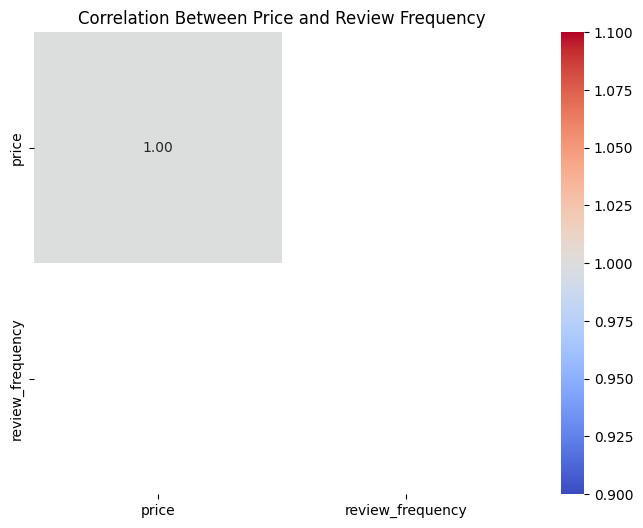

In [34]:
# 2. Heatmap for Correlation Between Price and Frequency of Reviews
# Merge the necessary data
heatmap_data = price_df.merge(review_df[['listing_id', 'last_review']], on='listing_id')

# Convert 'last_review' to datetime and calculate review frequency
heatmap_data['last_review'] = pd.to_datetime(heatmap_data['last_review'])
heatmap_data['review_month'] = heatmap_data['last_review'].dt.to_period('M')
review_frequency = heatmap_data.groupby('listing_id')['review_month'].count()

# Create a DataFrame with price and review frequency
correlation_data = pd.DataFrame({
    'price': heatmap_data.groupby('listing_id')['price'].mean(),
    'review_frequency': review_frequency
}).dropna()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Price and Review Frequency')
plt.show()


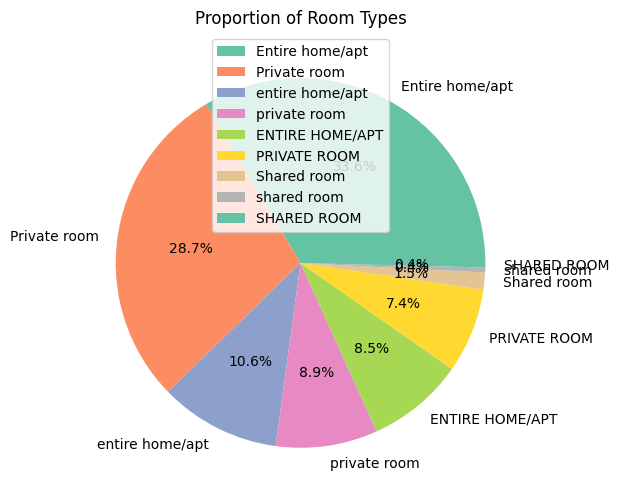

In [35]:
# 3. Pie Chart for Room Types Proportion
room_type_counts = room_type_df['room_type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2', len(room_type_counts)), legend=True)
plt.title('Proportion of Room Types')
plt.ylabel('')
plt.show()


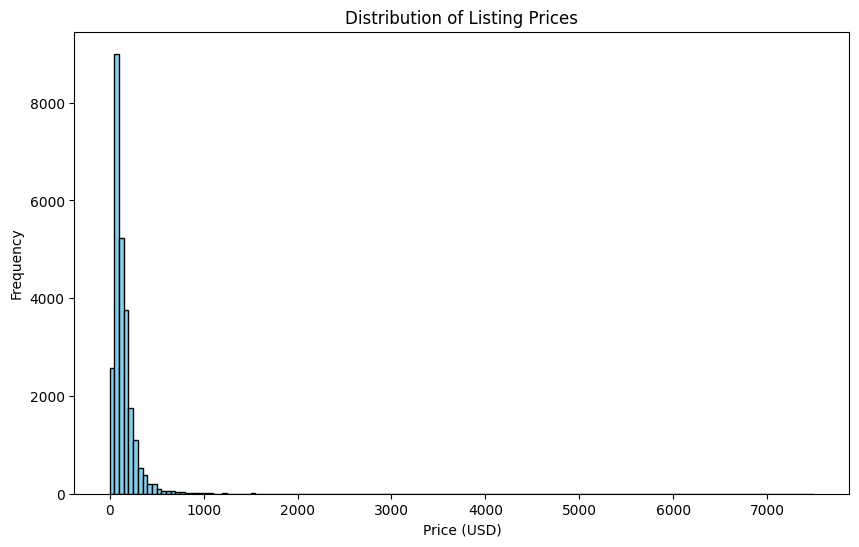

In [36]:
# 4. Histogram for Price Distribution
plt.figure(figsize=(10, 6))
plt.hist(price_df['price'], bins=range(0, int(price_df['price'].max()) + 50, 50), color='skyblue', edgecolor='black')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


C:\Users\DELL LATITUDE E 7450\AppData\Local\Temp\ipykernel_16348\1386020337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='nbhood_full', y='price', data=price_df, palette='Set2')


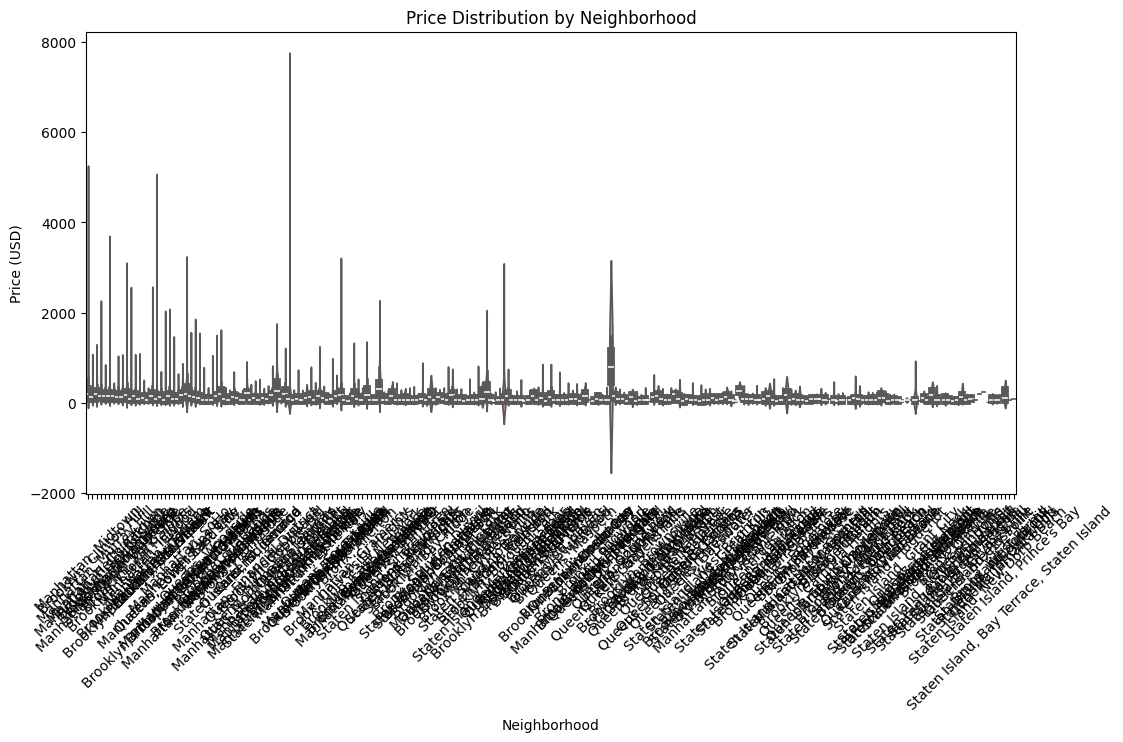

In [37]:

# 5. Violin Plot for Price Distribution by Neighborhood
plt.figure(figsize=(12, 6))
sns.violinplot(x='nbhood_full', y='price', data=price_df, palette='Set2')
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()
